In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 8
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2Z0MTQ5NjgvUmVwb3MvaW50cm8tY29kaW5nLWRhdGEtYW5hbHlzaXMvcXVhcnRvL3NsaWRlcw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/importlib/_bootstrap.py": 1716061061.963526, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/importlib/_bootstrap_external.py": 1716061061.9664707, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/zipimport.py": 1716061059.8541, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/codecs.py": 1716061059.3098388, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/aliases.py": 1716061060.5232508, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/__init__.py": 1716061060.520605, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/utf_8.py": 1716061061.3768034, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/abc.py": 1716061059.2254992, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/io.py": 1716061059.4591994, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/stat.py": 1716061059.7052634, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/_collections_abc.py": 17160

In [2]:
import numpy as np
from numpy import random
rng = random.default_rng(seed=24)

# 2D array (3×3 matrix)
array_2d = rng.random((3, 3))
print(f"Shape: {array_2d.shape}")
print(array_2d)

Shape: (3, 3)
[[0.33026884 0.40517732 0.57473782]
 [0.50639977 0.56421251 0.56968731]
 [0.87411653 0.08643046 0.74247527]]


In [3]:
# Access single element
print("Element at [1,2]:", array_2d[1, 2])

# Access entire row
print("First row:", array_2d[0, :])

# Access entire column  
print("First column:", array_2d[:, 0])

Element at [1,2]: 0.5696873105084019
First row: [0.33026884 0.40517732 0.57473782]
First column: [0.33026884 0.50639977 0.87411653]


In [4]:
print("First 2 rows:\n", array_2d[:2])

First 2 rows:
 [[0.33026884 0.40517732 0.57473782]
 [0.50639977 0.56421251 0.56968731]]


In [5]:
# Creating arrays with different shapes
zeros_2d = np.zeros((2, 3))  # 2 rows, 3 columns
random_3d = rng.integers(0, 3, size=(2, 3, 4))  # 2×3×4 tensor

print("2D shape:", zeros_2d.shape)
print("3D shape:", random_3d.shape)
print("3D rank/dimensions:", random_3d.ndim)

2D shape: (2, 3)
3D shape: (2, 3, 4)
3D rank/dimensions: 3


In [6]:
matrix = rng.integers(0, 5, size=(3, 4))
print("Original matrix:\n", matrix)

print("Sum along axis 0 (columns):", matrix.sum(axis=0))
print("Sum along axis 1 (rows):", matrix.sum(axis=1))
print("Mean along axis 0:", np.mean(matrix, axis=0))

Original matrix:
 [[0 2 4 3]
 [4 1 4 0]
 [2 3 4 3]]
Sum along axis 0 (columns): [ 6  6 12  6]
Sum along axis 1 (rows): [ 9  9 12]
Mean along axis 0: [2. 2. 4. 2.]


In [7]:
arr_1d = np.arange(12)
arr_2d = arr_1d.reshape((3, 4))
arr_3d = arr_1d.reshape((2, 2, 3))

print("1D:", arr_1d)
print("2D (3×4):\n", arr_2d)
print("3D shape:", arr_3d.shape)

1D: [ 0  1  2  3  4  5  6  7  8  9 10 11]
2D (3×4):
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
3D shape: (2, 2, 3)


In [8]:
# -1 means "figure out this dimension"
auto_reshape = arr_1d.reshape(-1, 4)  # ? rows, 4 columns
print("Auto-reshaped:\n", auto_reshape)

Auto-reshaped:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [9]:
matrix = rng.integers(0, 10, (2, 3))
print("Original:\n", matrix)

view = matrix.ravel()
view[0] = 99  # Changes original!
print("After modifying view:\n", matrix)

Original:
 [[7 0 4]
 [4 7 4]]
After modifying view:
 [[99  0  4]
 [ 4  7  4]]


In [10]:
matrix = rng.integers(0, 10, (2, 3))
copy = matrix.flatten()
copy[0] = 99  # Original unchanged
print("Original unchanged:\n", matrix)

Original unchanged:
 [[6 9 5]
 [5 5 3]]


In [11]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
vector = np.array([10, 20, 30])

# Vector is broadcast to each row
result = matrix + vector
print("Matrix + Vector:\n", result)

Matrix + Vector:
 [[11 22 33]
 [14 25 36]]


In [12]:
row_vec = np.arange(3).reshape(1, -1)    # Shape: (1, 3)
col_vec = np.arange(3).reshape(-1, 1)    # Shape: (3, 1)
grid = row_vec + col_vec                 # Shape: (3, 3)
print("Broadcast grid:\n", grid)

Broadcast grid:
 [[0 1 2]
 [1 2 3]
 [2 3 4]]


In [13]:
# System: 2x + 3y + z = 5, 4x - y = 1, 2y + z = 3
A = np.array([[2, 3, 1], 
              [4, -1, 0], 
              [0, 2, 1]])
b = np.array([[5], [1], [3]])

# Solve the system
x = np.linalg.solve(A, b)
print("Solution:", x.flatten())

# Verify: A @ x should equal b
print("Verification:\n", A @ x)

Solution: [0.5 1.  1. ]
Verification:
 [[5.]
 [1.]
 [3.]]


In [14]:
# Matrix multiplication with @
result = A @ x

# Transpose with .T
print("b transpose:", b.T)

# Dot product
dot_product = np.dot(b.T, b)
print("Dot product:", dot_product)

# Matrix inverse
A_inv = np.linalg.inv(A)
x_alt = A_inv @ b  # Alternative solution method

b transpose: [[5 1 3]]
Dot product: [[35]]


Text(0.5, 1.0, 'imshow (origin=lower)')

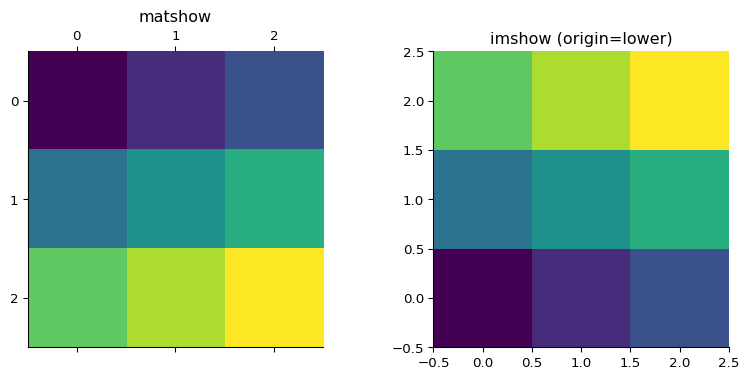

In [15]:
import matplotlib.pyplot as plt

# Simple matrix visualization
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.matshow(matrix)
ax1.set_title('matshow')

ax2.imshow(matrix, origin='lower')
ax2.set_title('imshow (origin=lower)')

Image shape: (512, 512)


Text(0.5, 1.0, 'Grayscale Image')

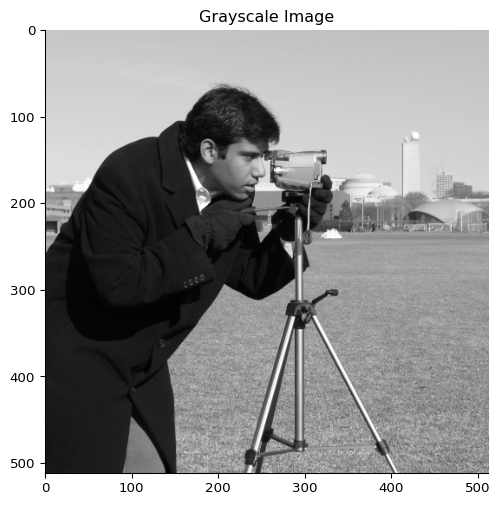

In [16]:
from skimage import data

# Grayscale image
gray_image = data.camera()
print("Image shape:", gray_image.shape)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(gray_image, cmap='gray')
ax.set_title('Grayscale Image')

Color image shape: (300, 451, 3)


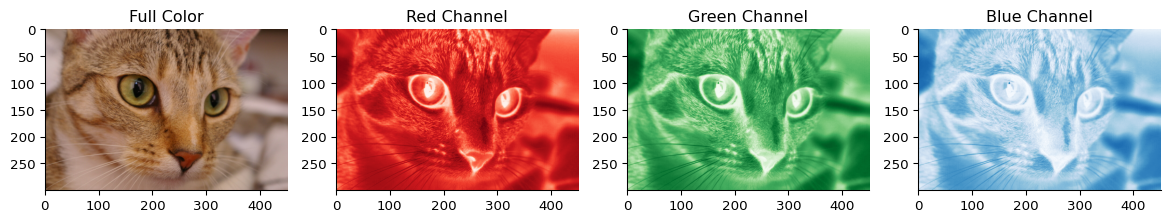

In [17]:
# Color image has 3 channels: RGB
color_image = data.chelsea()
print("Color image shape:", color_image.shape)

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

axes[0].imshow(color_image)
axes[0].set_title('Full Color')

# Individual color channels
channels = ['Reds', 'Greens', 'Blues']
titles = ['Red Channel', 'Green Channel', 'Blue Channel']

for i, (cmap, title) in enumerate(zip(channels, titles)):
    axes[i+1].imshow(color_image[:, :, i], cmap=cmap)
    axes[i+1].set_title(title)

Text(0.5, 1.0, 'Thresholded (>120)')

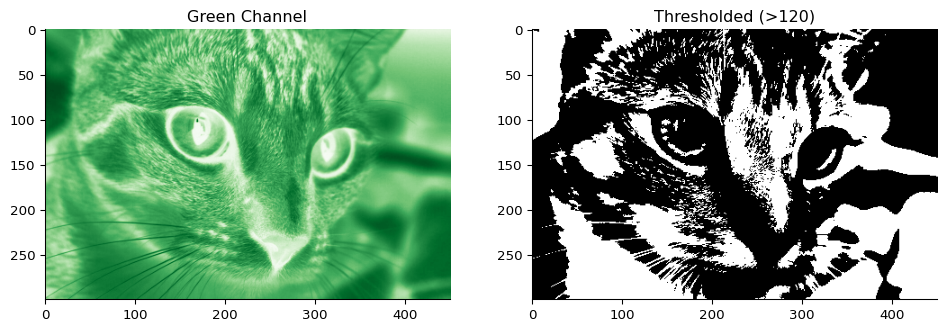

In [18]:
# Extract green channel
green = color_image[:, :, 1]

# Create binary mask
threshold_mask = green > 120

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(green, cmap='Greens')
ax1.set_title('Green Channel')

ax2.imshow(threshold_mask, cmap='gray')
ax2.set_title('Thresholded (>120)')